# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 22 de Septiembre 11:59 pm**

## Librerias

In [1]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

## Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros,

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$,
$dt = 0.01 \text{ s }$

y tomando gravedad como,

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos,

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica.

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma,

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [3]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;

    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }

    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    // su codigo aqui



    return 0;
}

Overwriting parabolico.cpp


In [4]:
%%writefile parabolico3.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total / dt;
    cout << N;

    double pos_x[N];
    double pos_y[N];
  


    for (int i = 0; i < N; i++) {

    
        pos_x[i] = x_init + (vx_init/b)* (1.0 - exp(-b * i*dt));
         
        pos_y[i] = y_init + vy_init * i * dt - 0.5 * g * pow(i * dt, 2) - 0.5 * b * pow(vy_init, 2) * (1.0 - exp(-(b) * i*dt));
    }

    for (int i = 0; i < N; i++) {
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }

    std::ofstream myfile;
    myfile.open("x_values3.csv");
    myfile << "x,y\n";
    for (int i = 0; i < N; i++) {
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();
    return 0;
}


Overwriting parabolico3.cpp


In [5]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

In [6]:
%%script bash

g++ parabolico3.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.0999001 10.0795 0.199601 10.1581 0.299102 10.2357 0.398404 10.3123 0.497508 10.388 0.596414 10.4627 0.695123 10.5365 0.793634 10.6093 0.891948 10.6811 0.990066 10.752 1.08799 10.8219 1.18571 10.8909 1.28325 10.9589 1.38058 11.0259 1.47772 11.092 1.57467 11.1571 1.67142 11.2212 1.76799 11.2844 1.86435 11.3466 1.96053 11.4079 2.05651 11.4682 2.1523 11.5275 2.2479 11.5859 2.34331 11.6433 2.43853 11.6998 2.53356 11.7553 2.62839 11.8098 2.72304 11.8634 2.8175 11.916 2.91177 11.9676 3.00586 12.0183 3.09975 12.068 3.19346 12.1168 3.28698 12.1646 3.38031 12.2114 3.47346 12.2573 3.56642 12.3022 3.65919 12.3462 3.75178 12.3891 3.84418 12.4312 3.9364 12.4722 4.02844 12.5123 4.12029 12.5514 4.21196 12.5896 4.30344 12.6268 4.39474 12.6631 4.48586 12.6983 4.5768 12.7326 4.66755 12.766 4.75813 12.7984 4.84852 12.8298 4.93874 12.8603 5.02877 12.8897 5.11862 12.9183 5.20829 12.9458 5.29779 12.9724 5.3871 12.9981 5.47624 13.0228 5.5652 13.0465 5.65398 13.0692 5.74258 13.091 5.

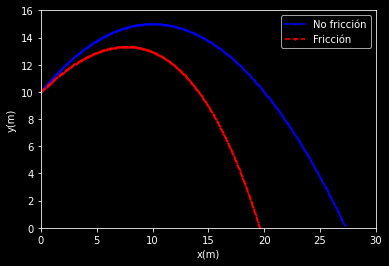

In [7]:
df = pd.read_csv("./x_values.csv")
x = np.array(df["x"])
y = np.array(df["y"])

df2 = pd.read_csv("./x_values3.csv")
x2 = np.array(df2["x"])
y2 = np.array(df2["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y, label='No fricción', linestyle='-', marker='o', markersize=1, color='b')
plt.plot(x2, y2, label='Fricción', linestyle='--', marker='s', markersize=1, color='r')
plt.legend()
plt.show()

In [8]:
%%script bash

rm parabolico x_values.csv

## Problema 2

Considere un sistema compuesto por una esfera hueca de radio $R$ y masa $M$ que gira sin deslizar la cual está conectada en su centro a un resorte con longitud natural (sin estirar) $l$ del cual cuelga una masa $m$ como se muestra en la figura.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/pendulo_resorte_cuerpo_rigido.png)

Considere $l_1$, $l_2$, como se muestran en la figura, $f_r$ la fuerza de fricción entre la esfera hueca y la superficie, y $x$, y $y$ como las coordenadas de la masa $m$.

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema son las siguientes,

\begin{align}
m \ddot x &= - k(l_2 - l) \sin{(\theta)} \\
m \ddot y &= - mg + k(l_2 - l) \cos{(\theta)} \\
M \ddot l_1 &= k(l_2 - l) \sin{(\theta)} - f_r \\
f_r &= \frac{2}{3}M \ddot l_1 \\
\ddot x &= \ddot l_1 + \ddot l_2 \sin{(\theta)} + 2 \dot l_2 \cos{(\theta)} \dot \theta - l_2 \sin{(\theta)} (\dot \theta) ^2 + l_2\cos{(\theta)} \ddot \theta\\
\ddot y &= - \ddot l_2 \cos{(\theta)} + 2 \dot l_2 \sin{(\theta)} \dot \theta + l_2 \cos{(\theta)} (\dot \theta) ^2 + l_2\sin{(\theta)} \ddot \theta\\
\end{align}

Sus ecuaciones y demonstración aquí,

![](https://i.postimg.cc/9fQFH16x/Demos-1.png)
![](https://i.postimg.cc/pdcVWzxP/Demos-2.png)


b) Dado que el sistema se puede especificar en términos de solamente las tres coordenadas $(\theta, l_1, l_2)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las tres siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot \theta = \frac{ - 10 Mg\sin{(\theta)} - 20M \dot l_2 \dot \theta - 3k(l_2 - l)\sin{(2\theta)}}{10Ml_2}
\end{equation}

\begin{equation}
\ddot l_1 = \frac{3k(l_2 - l)\sin{(\theta)}}{5M}
\end{equation}

\begin{equation}
\ddot l_2 = g\cos{(\theta)} - \frac{k(l_2-l)}{m} + l_2(\dot \theta)^2 - \frac{3k (l_2 - l)\sin^2{(\theta)}}{5M}
\end{equation}

Se deben imprimir las dos ecuaciones resultantes en el notebook.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

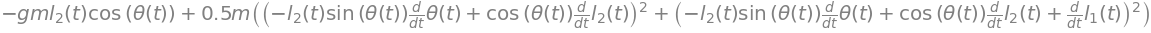

In [9]:
sym.init_printing()

# Definir variables simbólicas
t, k, m, M, l, g = sym.symbols('t k m M l g')

# Coordenadas función del tiempo
theta = sym.symbols(r'\theta', cls = sym.Function) # theta será función del tiempo
theta = theta(t)

l1 = sym.symbols(r'l1', cls = sym.Function) # l1 será función del tiempo
l1 = l1(t)

l2 = sym.symbols(r'l2', cls = sym.Function) # l2 será función del tiempo
l2 = l2(t)

# Derivadas de theta
dTheta = sym.diff(theta, t)
ddTheta = sym.diff(dTheta, t)

# Derivadas de l1
dl1 = sym.diff(l1, t)
ddl1 = sym.diff(dl1, t)

# Derivadas de l2
dl2 = sym.diff(l2, t)
ddl2 = sym.diff(dl2, t)

# Definir x,y
x,y = sym.symbols('x y', cls = sym.Function)
x = x(theta, l1, l2)
y = y(theta, l2)

# ligaduras de camino
x = l1 + l2*sym.cos(theta)
y = l2*sym.cos(theta)

# Definir T, V y L
T = 1/2 * m * (sym.diff(x,t)**2 + sym.diff(y,t)**2)
V = m*g*y

L = T - V
L # Lagrangiano es función de Theta, l1, l2 y sus derivadas

Habiendo calculado el lagrangiano del problema, se reemplazará en la ecuación de Lagrange para obtener la ecuación de movimiento asociado a cada coordenada generalizada:

$$\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta} = 0$$

$$\frac{d}{dt} \frac{\partial L}{\partial \dot{l_1}} - \frac{\partial L}{\partial l_1} = 0$$

$$\frac{d}{dt} \frac{\partial L}{\partial \dot{l_2}} - \frac{\partial L}{\partial l_2} = 0$$

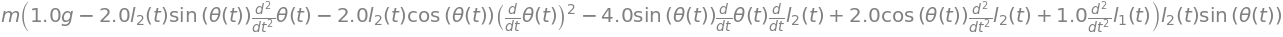

In [10]:
LE = sym.diff(L, theta) - sym.diff(sym.diff(L, dTheta), t)
LE = LE.simplify()
LE

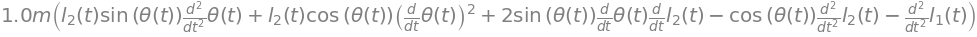

In [11]:
LE = sym.diff(L, l1) - sym.diff(sym.diff(L, dl1), t)
LE = LE.simplify()
LE

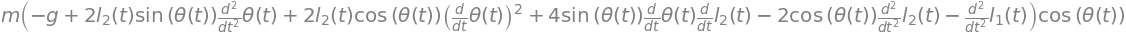

In [12]:
LE = sym.diff(L, l2) - sym.diff(sym.diff(L, dl2), t)
LE = LE.simplify()
LE

## Problema 3

A partir de las ecuaciones de segundo grado del problema 2, resuelva las ecuaciones diferenciales anteriores con un tiempo total de 5 segundos y pasos $dt$ de 0.005 segundos, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación,

(Cambie el siguiente link de youtube por su simulación)

https://www.youtube.com/watch?v=JiHAw8IXkuU

Para la simulación use los siguientes parametros:

$l = 1 \text{ m}, \quad R = 0.2 \text{ m}, \quad l_1(t=0) = -1.5 \text{ m}, \quad l_2(t=0) = 1 \text{ m}, \quad \dot l_1(t=0) = 0.4 \text{ m/s}, \quad \dot l_2(t=0) = 0 \text{ m/s}, \quad m = 8 \text{ kg}, \quad M = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta(t=0)= 70^\circ, \quad \dot \theta(t=0)= 0 \text{ rad/s}, \quad dt = 0.005 \text{s}, \quad t_{\text{total}} = 5 \text{ s}$.

In [13]:
#parámetros
g = 9.8 # m/s^2
m = 8 # kg
M = 10 # kg
k = 300 # N/m
l = 1 # m longitud natural del resorte sin estirar
R = 0.2 # m radio de la esfera hueca
tiempo = 5 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta_init = 70. * np.pi/180. # angulo inicial respecto a la vertical (rad)
l1_init = -1.5 # m Posicion inicial de la masa M
l2_init = 1. # m longitud inicial del resorte
v1_init = 0.4 # m/s Velocidad inicial la masa M
v2_init = 0. # m/s Velocidad inicial la masa m
omega_init = 0.0 # velocidad angular inicial respecto a la vertical de la masa colgada (rad/s)

In [14]:
## su simulación aqui
def Omega_dt (w, M,g, m, k, l, R):
    theta_init, l1_init, l2_init, v1_init, v2_init, omega_init = w
    P2= 10 * M * l2_init
    P1= -(10*M*g*np.sin(theta_init))-(20*M*omega_init*v2_init)-(3*k*(l2_init-l)*np.sin(2*theta_init))
    return P1 / P2

def V1_dt (w, M,g, m, k, l, R):
    theta_init, l1_init, l2_init, v1_init, v2_init, omega_init = w
    P4= 5*M
    P3= 3*k*(l2_init-l)*np.sin(theta_init)
    return P3 / P4

def V2_dt (w, M,g, m, k, l, R):
    theta_init, l1_init, l2_init, v1_init, v2_init, omega_init = w
    P5= g * np.cos(theta_init)
    P6= (k*(l2_init-l))/(m)
    P7= l2_init * (omega_init**2)
    P8= (3*k*(l2_init-l)*(np.sin(theta_init)**2))/(5*M)
    return P5-P6+P7-P8

def pendulo (t, w, M, g, m, k, l, R):
    theta_init, l1_init, l2_init, v1_init, v2_init, omega_init = w
    theta_dt= omega_init
    l1_dt= v1_init
    l2_dt= v2_init
    de_omega= Omega_dt(w, M,g, m, k, l, R)
    de_v1= V1_dt(w, M,g, m, k, l, R)
    de_v2= V2_dt(w, M,g, m, k, l, R)
    return [theta_dt, l1_dt, l2_dt, de_v1, de_v2, de_omega]

cond_ini = np.array([theta_init, l1_init, l2_init, v1_init, v2_init, omega_init])

def solucion_ecuaciones(cond_ini, g, m, M, k, l, R, tiempo, puntos):
    t = np.linspace(0, tiempo, puntos)
    args = (g, m, M, k, l, R)
    sol = integrate.solve_ivp(pendulo, [0, tiempo], cond_ini, "DOP853", t, args=args)
    return sol

sol = solucion_ecuaciones(cond_ini, g, m, M, k, l, R, tiempo, puntos)

def polares_a_catesianas(soluciones, g, m, M, k, l, R):
    y1 = np.full(1000, 0.2)
    x1 = soluciones[1,:]
    x2 = x1 + (soluciones[2,:]*np.sin(soluciones[0,:]))
    y2 = y1 - (soluciones[2,:]*np.cos(soluciones[0,:]))
    return np.array([x1, y1, x2, y2])

data = polares_a_catesianas(sol.y, g, m, M, k, l, R)


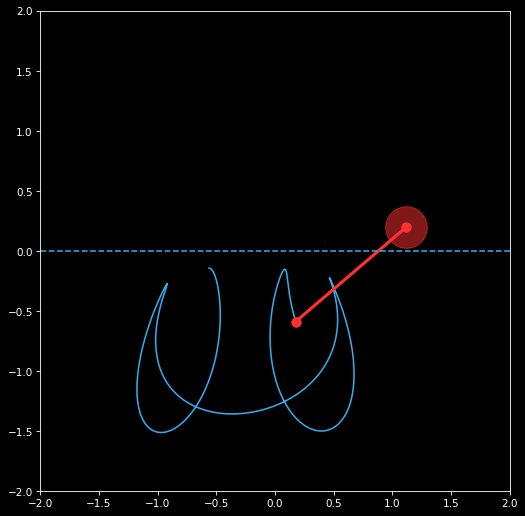

In [15]:
fps = 24 # fotogramas por segundo

def update(num_frame,d,elements,paso):
    j = num_frame * paso
    masa1,sombra, masa2, brazo, trayectoria2, x_axis_line  = elements
    trayectoria2.set_data(d[2:4, :j+1])
    masa1.set_offsets(d[0:2, j:j+1].T)
    sombra.set_offsets(d[0:2, j:j+1].T)
    masa2.set_offsets(d[2:4, j:j+1].T)
    brazo.set_data([d[0, j], d[2, j]], [d[1, j], d[3, j]])

def inicializar_elementos_graficos(d,M,m,ax):
    masa1 = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
    sombra= ax.scatter(d[0, :1], d[1, :1] ,s=1600,c='#ff303080')
    masa2 = ax.scatter(d[2, :1], d[3, :1] ,s=80, c='#ff3030')
    brazo, = ax.plot([d[0, 0],d[2, 0]],[d[1, 0],d[3, 0]],c='#ff3030',lw=3)
    trayectoria2, = ax.plot(d[2, :1], d[3, :1],c='#34abeb',zorder=-1)
    x_axis_line = ax.plot([-5, 5], [0, 0], c='#34abeb', linestyle='--') 
    return masa1,sombra, masa2, brazo, trayectoria2, x_axis_line

def ajustar_ejes_coordenados(l1,l2):
    fig = plt.figure(figsize = (7,7), dpi = 75)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
    ax = fig.gca()
    plt.tight_layout()
    plt.xlim([-l1 - l2, l1 + l2])
    plt.ylim([-l1 - l2, l1 + l2])
    return fig, ax

def crear_animacion(data, l1, l2, M, m, tiempo, fps, name):
    N = tiempo*fps
    paso = int(np.floor(data.shape[1] / N))
    if paso<1: raise ValueError('Escoje puntos > '+ str(N))
    fig, ax = ajustar_ejes_coordenados(l1,l2)
    elements = inicializar_elementos_graficos(data,M,m,ax)
    ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
    return ani
    #ani.save(name,fps=fps)
    #plt.close(fig)

start_time = time.time()
crear_animacion(data[:4], l, l, M, m, tiempo, fps,'sistema_pendulo_resorte_cuerporigido.gif')

In [16]:
# use el siguiente codigo para evaluar el tiempo de su simulacion
print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 6.096791744232178
